# <center>Intel Image Classification</center>
## <center>Exploratory Data Analysis + Data Visualization + Modelling</center>

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from warnings import filterwarnings
filterwarnings('ignore')

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ReduceLROnPlateau

print('Libraries imported!')

Libraries imported!


## Exploratory Data Analysis

In [2]:
train_path = (r'C:\\Users\\Haluk Sumen\\Desktop\\Projects\\Intel Image Classification\\data\\seg_train\\seg_train\\')
test_path = (r'C:\\Users\\Haluk Sumen\\Desktop\\Projects\\Intel Image Classification\\data\\seg_test\\seg_test\\')
pred_path = (r'C:\\Users\\Haluk Sumen\\Desktop\\Projects\\Intel Image Classification\\data\\seg_pred\\seg_pred\\')

## Data Visualization

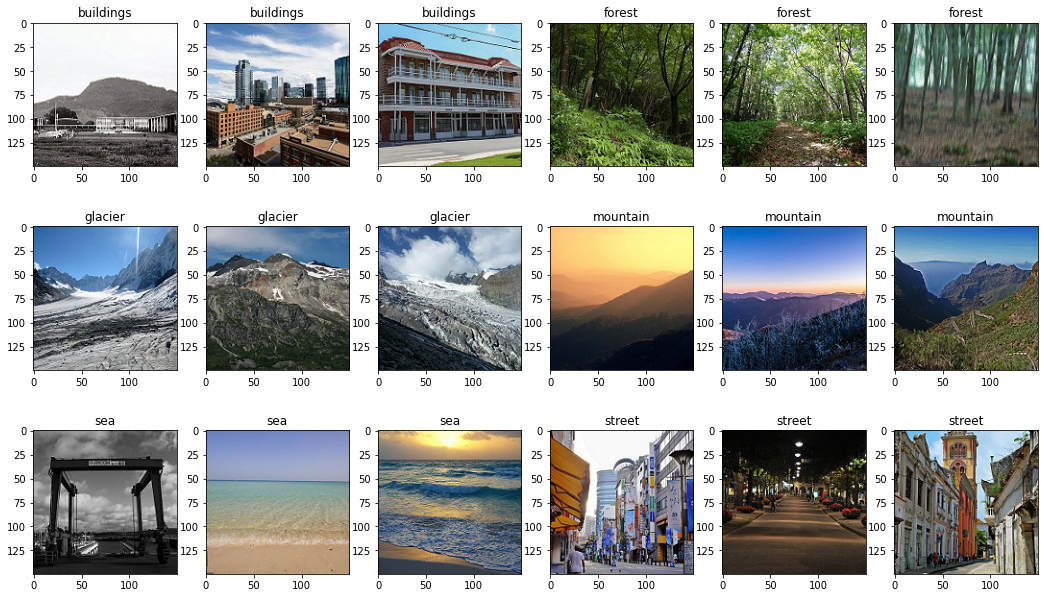

In [3]:
#Visualization of Train Path
def visualize_data(folder):
    c=1
    directory=os.listdir(folder)
    plt.figure(figsize=(18,15))
    for each in directory:
        currentFolder=folder+ "/" +each
        for i, file in enumerate(os.listdir(currentFolder)[0:3]):
            full_path=currentFolder+"/"+file
            plt.subplot(3, 6, c)
            img = mpimg.imread(full_path)
            plt.imshow(img)
            plt.title(each)
            c+=1
    plt.subplots_adjust(hspace=-0.5)
    plt.show()
    
visualize_data(train_path)

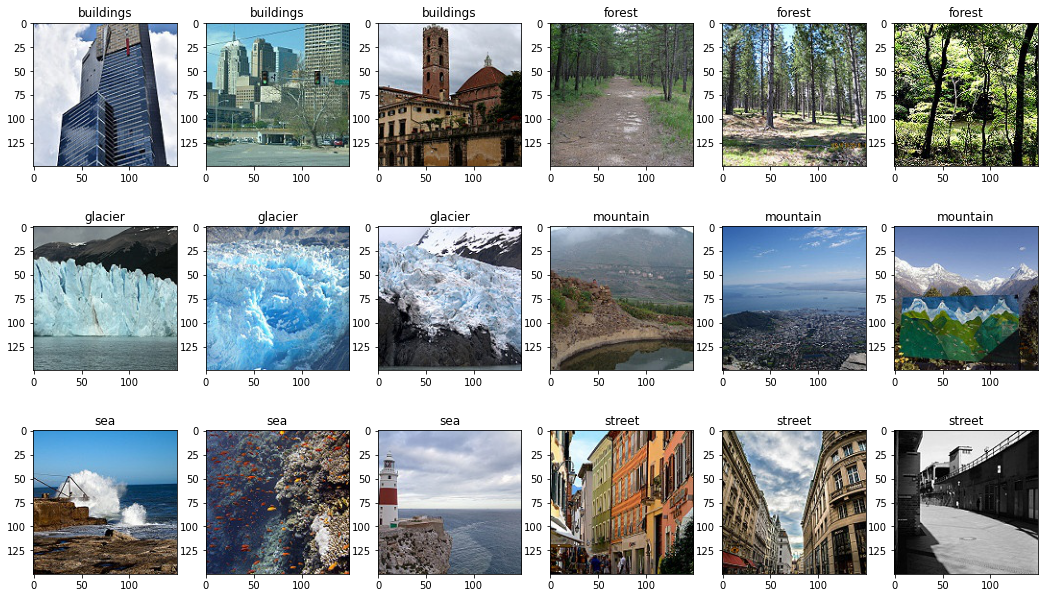

In [4]:
#Visualization of Test Path
def visualize_data(folder):
    c=1
    directory=os.listdir(folder)
    plt.figure(figsize=(18,15))
    for each in directory:
        currentFolder=folder+ "/" +each
        for i, file in enumerate(os.listdir(currentFolder)[0:3]):
            full_path=currentFolder+"/"+file
            plt.subplot(3, 6, c)
            img = mpimg.imread(full_path)
            plt.imshow(img)
            plt.title(each)
            c+=1
    plt.subplots_adjust(hspace=-0.5)
    plt.show()
    
visualize_data(test_path)

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1/255.0, 
        featurewise_center=True,
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(
        rescale=1/255.0)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        shuffle=True,
        target_size=(150,150),
        batch_size=128,
        class_mode='categorical'
    )
test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle=True,
        target_size=(150,150),
        batch_size=128,
        class_mode='categorical'
    )
    
train_generator, test_generator

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x1b486e04b08>,
 <keras.preprocessing.image.DirectoryIterator at 0x1b48922b448>)

In [7]:
def get_defined_label(x):
    label_dict = {0:'building', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
    for key, value in label_dict:
        if key == x:
            return value

In [8]:
base_model = InceptionResNetV2(
        input_shape=(150,150,3),
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )
base_model.trainable = False

In [9]:
print('Base Model Ouput Shape = {}'.format(base_model.output_shape))
last_output = base_model.output

Base Model Ouput Shape = (None, 1536)


In [10]:
x = tf.keras.layers.Dropout(0.2)(last_output)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=6, activation='softmax')(x)

In [11]:
model = tf.keras.Model( base_model.input, x) 

In [12]:
model.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0002, momentum=0.9, centered=True), 
        loss = ['categorical_crossentropy'], 
        metrics = ['accuracy']
    )

In [13]:
learning_rate_reduction =[
    ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=1,
        verbose=1,
        factor=0.25,
        min_lr=0.000003),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0.001, 
        patience=5, 
        verbose=1,
        mode='auto', 
        baseline=None, 
        restore_best_weights=True)]

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
history = model.fit_generator(
    train_generator, 
    epochs=10, 
    validation_data=test_generator,
    callbacks=[learning_rate_reduction]
    )

Epoch 1/10
110/110 [==============================] - 430s 4s/step - loss: 0.7721 - accuracy: 0.7192 - val_loss: 0.3546 - val_accuracy: 0.8710
Epoch 2/10
110/110 [==============================] - 457s 4s/step - loss: 0.5602 - accuracy: 0.7943 - val_loss: 0.3482 - val_accuracy: 0.8710

Epoch 00002: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 3/10
110/110 [==============================] - 852s 8s/step - loss: 0.4910 - accuracy: 0.8219 - val_loss: 0.3056 - val_accuracy: 0.8893
Epoch 4/10
110/110 [==============================] - 476s 4s/step - loss: 0.4612 - accuracy: 0.8323 - val_loss: 0.2966 - val_accuracy: 0.8937
Epoch 5/10
110/110 [==============================] - 489s 4s/step - loss: 0.4504 - accuracy: 0.8348 - val_loss: 0.2842 - val_accuracy: 0.8963
Epoch 6/10
110/110 [==============================] - 468s 4s/step - loss: 0.4434 - accuracy: 0.8341 - val_loss: 0.2833 - val_accuracy: 0.8977
Epoch 7/10
110/110 [==============================] - 467s 4s

In [40]:
score = model.evaluate_generator(test_generator)
print('\nScore [ {} ] '.format(dict(zip(model.metrics_names, score))))


Score [ {'loss': 0.26823461055755615, 'accuracy': 0.9023333191871643} ] 


In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

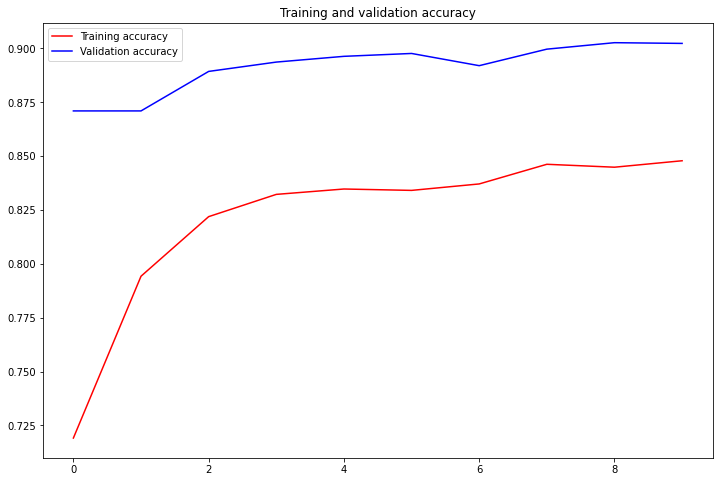

In [38]:
plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

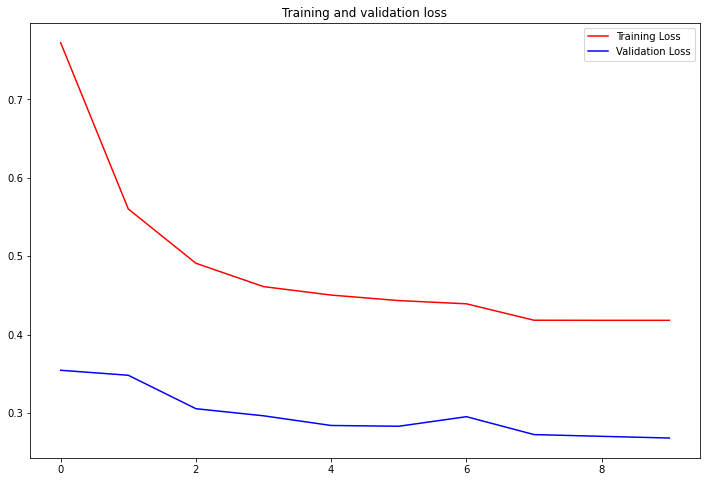

In [39]:
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()